<a href="https://colab.research.google.com/github/COGS118A/Group014-Wi23/blob/main/PreliminaryResults118a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support

In [2]:
url = "https://raw.githubusercontent.com/COGS118A/Group014-Wi23/main/nba_api_merged_injuries"
data = pd.read_csv(url)

In [3]:
data.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,SEASON_YEAR,SEVERE_INJURY,MINOR_INJURY
0,201985,AJ Price,AJ,1610612754,IND,24.0,50,22,28,0.440,...,153,278,270,240,253,210,408,2010,True,False
1,201166,Aaron Brooks,Aaron,1610612756,PHX,26.0,59,26,33,0.441,...,133,259,179,143,151,109,390,2010,True,False
2,201189,Aaron Gray,Aaron,1610612740,NOH,26.0,41,21,20,0.512,...,420,332,338,361,347,378,23,2010,True,False
3,201151,Acie Law,Acie,1610612744,GSW,26.0,51,20,31,0.392,...,100,307,305,304,326,326,264,2010,True,False
4,1733,Al Harrington,Al,1610612743,DEN,31.0,73,45,28,0.616,...,50,258,130,112,141,119,319,2010,True,False


In [4]:
data.loc[:,["SEVERE_INJURY", "MINOR_INJURY"]] = data[["MINOR_INJURY", "SEVERE_INJURY"]].fillna(False) #replaces NAs with falses, because 
#NAs mean there was nothing in the injury set when we did the join

In [11]:
data.columns # view columns which are "features"

Index(['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING', 'OFF_RATING',
       'sp_work_OFF_RATING', 'E_DEF_RATING', 'DEF_RATING',
       'sp_work_DEF_RATING', 'E_NET_RATING', 'NET_RATING',
       'sp_work_NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT',
       'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'E_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'USG_PCT', 'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'sp_work_PACE',
       'PIE', 'POSS', 'FGM', 'FGA', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'E_OFF_RATING_RANK',
       'OFF_RATING_RANK', 'sp_work_OFF_RATING_RANK', 'E_DEF_RATING_RANK',
       'DEF_RATING_RANK', 'sp_work_DEF_RATING_RANK', 'E_NET_RATING_RANK',
       'NET_RATING_RANK', 'sp_work_NET_RATING_RANK', 'AST_PCT_RANK',
       'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK',
       'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'E_TOV_PCT_

In [6]:
features = data.columns[5:-3]
X = data[features].copy()
injuries = data.columns[-2:]
y = data[injuries].copy()
X = X.values
# make this a two-class classifier with injured or not, treating minor and major as the same. This is just for preliminary results,
# we will explore multi-class solutions later
y['INJURY'] = (y['SEVERE_INJURY'] | y['MINOR_INJURY'])
y = y[['INJURY']]
y = np.ravel(y.values)

In [7]:
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X=X, y=y, groups=data['PLAYER_NAME']))
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

In [8]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step 1: Preprocessing with StandardScaler
    ('knn', KNeighborsClassifier()) # Step 2: KNN classification
])

knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

In [9]:
def fbeta_score(y_true, y_pred, beta):
    precision, recall, fbeta, _ = precision_recall_fscore_support(y_true, y_pred, beta=beta, average="binary")
    return precision, recall, fbeta

In [10]:
precision, recall, fbeta = fbeta_score(y_test, y_pred, 2)
print(f"The precision is {precision}, the recall is {recall}, and the fbeta with beta=2 is {fbeta}")

The precision is 0.6995412844036697, the recall is 0.7840616966580977, and the fbeta with beta=2 is 0.7655622489959839


In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [13]:
cm = confusion_matrix(y_test, y_pred)

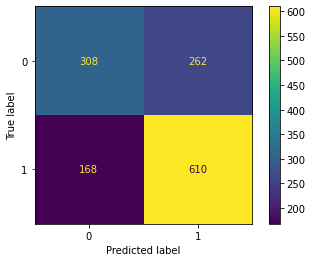

In [19]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
